Paper: https://aip.scitation.org/doi/pdf/10.1063/1.4991229

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
d = pd.read_csv('Binance_ETHUSDT_d.csv', skiprows = 1)[::-1].reset_index(drop=True)

In [166]:
min(d.Date), max(d.Date)

('2017-08-17', '2023-01-17')

In [167]:
d = d[['Open', 'Close']]
d["delta"] = d.Close - d.Open
d["m"] = np.abs(d.delta)
d["maxmove"] = d.m.rolling(14).max()
d["a"] = d.maxmove * 0.15
d["b"] = d.maxmove * 0.3
d["c"] = d.maxmove * 0.45
d["d"] = d.maxmove * 0.6
d["e"] = d.maxmove * 0.75
d = d.dropna()
d

,Open,Close,delta,m,maxmove,a,b,c,d,e
13,374.70,385.93,11.23,11.23,27.70,4.1550,8.310,12.4650,16.620,20.7750
14,384.64,384.79,0.15,0.15,27.70,4.1550,8.310,12.4650,16.620,20.7750
15,386.44,388.46,2.02,2.02,27.70,4.1550,8.310,12.4650,16.620,20.7750
16,388.58,343.14,-45.44,45.44,45.44,6.8160,13.632,20.4480,27.264,34.0800
17,343.56,341.77,-1.79,1.79,45.44,6.8160,13.632,20.4480,27.264,34.0800
...,...,...,...,...,...,...,...,...,...,...
1975,1415.91,1451.20,35.29,35.29,53.76,8.0640,16.128,24.1920,32.256,40.3200
1976,1451.21,1549.90,98.69,98.69,98.69,14.8035,29.607,44.4105,59.214,74.0175
1977,1549.91,1552.52,2.61,2.61,98.69,14.8035,29.607,44.4105,59.214,74.0175
1978,1552.52,1576.94,24.42,24.42,98.69,14.8035,29.607,44.4105,59.214,74.0175


In [168]:
# Very bearish fuzzy momentum value of ith day
def vbr(x, a, b):
    if x <= a:
        return 1
    if x >= b:
        return 0
    return (b - x) / (b - a)

# Bearish fuzzy momentum value of ith day 
def br(x, a, b, c):
    if x <= a:
        return 0
    if x > a and x < b:
        return (x - a) / (b - a)
    if x >= b and x < c:
        return (c - x) / (c - b)
    return 1
    

# Neutral fuzzy momentum value of ith day 
def neu(x, a, b, c, d):
    if x <= b:
        return 0
    if b < x and x <= c:
        return (x - b) / (c - b)
    if c < x and x < d:
        return (d - x) / (d - c)
    return 1

# Bullish fuzzy momentum value of ith day 
def bl(x, c, d, e):
    if x <= c:
        return 0
    if c < x and x <= d:
        return (x - c) / (d - c)
    if d < x and x <= e:
        return (e - x) / (e - d)
    return 1
# Very bullish fuzzy momentum value of ith day 
def vbl(x, d, e):
    if x >= e:
        return 1
    if x <= d:
        return 0
    return (x - d) / (e - d)

In [169]:
d['vbr'] = d.apply(lambda row : vbr(row['m'],row['a'], row['b']), axis = 1)
d['br'] =  d.apply(lambda row : br(row['m'],row['a'], row['b'], row['c']), axis = 1)
d['neu'] =  d.apply(lambda row : neu(row['m'],row['a'], row['b'], row['c'], row['d']), axis = 1)
d['bl'] =  d.apply(lambda row : bl(row['m'],row['c'], row['d'], row['e']), axis = 1)
d['vbl'] =  d.apply(lambda row : vbl(row['m'], row['d'], row['e']), axis = 1)

In [170]:
d

,Open,Close,delta,m,maxmove,a,b,c,d,e,vbr,br,neu,bl,vbl
13,374.70,385.93,11.23,11.23,27.70,4.1550,8.310,12.4650,16.620,20.7750,0.00000,0.297232,0.702768,0.00000,0.00000
14,384.64,384.79,0.15,0.15,27.70,4.1550,8.310,12.4650,16.620,20.7750,1.00000,0.000000,0.000000,0.00000,0.00000
15,386.44,388.46,2.02,2.02,27.70,4.1550,8.310,12.4650,16.620,20.7750,1.00000,0.000000,0.000000,0.00000,0.00000
16,388.58,343.14,-45.44,45.44,45.44,6.8160,13.632,20.4480,27.264,34.0800,0.00000,1.000000,1.000000,1.00000,1.00000
17,343.56,341.77,-1.79,1.79,45.44,6.8160,13.632,20.4480,27.264,34.0800,1.00000,0.000000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1415.91,1451.20,35.29,35.29,53.76,8.0640,16.128,24.1920,32.256,40.3200,0.00000,1.000000,1.000000,0.62376,0.37624
1976,1451.21,1549.90,98.69,98.69,98.69,14.8035,29.607,44.4105,59.214,74.0175,0.00000,1.000000,1.000000,1.00000,1.00000
1977,1549.91,1552.52,2.61,2.61,98.69,14.8035,29.607,44.4105,59.214,74.0175,1.00000,0.000000,0.000000,0.00000,0.00000
1978,1552.52,1576.94,24.42,24.42,98.69,14.8035,29.607,44.4105,59.214,74.0175,0.35039,0.649610,0.000000,0.00000,0.00000


In [191]:
def get_fuzzy_momentum(delta, vbr, br, neu, bl , vbl):
    npar = np.array([vbr, br, neu, bl , vbl])
    npar.sort()
    if delta >= 0:
        return npar[-1]
    return npar[-2]

BEARISH_THRESHOLD = 0.5
BULLISH_THRESHOLD = 0.6
def categorize_fuzzy(f):
    if f <= BEARISH_THRESHOLD:
        return -1
    if f > BULLISH_THRESHOLD:
        return 1
    return 0

def categorize_move(move):
    if move < 0:
        return -1
    if move > 0:
        return 1
    return 0

In [192]:
d["fuzzy"] = d.apply(lambda row : get_fuzzy_momentum(
    row['delta'], row['vbr'], row['br'], row['neu'], row['bl'], row['vbl']), axis = 1)
d["fuzzymean"] = d.fuzzy.rolling(14).mean()
d = d.dropna()
d["pred"] = d.apply(lambda row: categorize_fuzzy(row['fuzzymean']), axis = 1)
d["catmove"] = d.apply(lambda row: categorize_move(row['delta']), axis = 1)
d["true"] = d.catmove.shift(-1)
d = d.dropna()

In [193]:
d

,Open,Close,delta,m,maxmove,a,b,c,d,e,vbr,br,neu,bl,vbl,fuzzy,pred,catmove,true,fuzzymean
39,282.00,294.42,12.42,12.42,60.55,9.0825,18.165,27.2475,36.330,45.4125,0.632535,0.367465,0.000000,0.00000,0.00000,0.632535,0,1,-1.0,0.554260
40,294.42,287.90,-6.52,6.52,60.55,9.0825,18.165,27.2475,36.330,45.4125,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,-1,1.0,0.554260
41,289.91,309.74,19.83,19.83,60.55,9.0825,18.165,27.2475,36.330,45.4125,0.000000,0.816680,0.183320,0.00000,0.00000,0.816680,1,1,-1.0,0.609473
42,309.81,302.44,-7.37,7.37,37.04,5.5560,11.112,16.6680,22.224,27.7800,0.673506,0.326494,0.000000,0.00000,0.00000,0.326494,0,-1,-1.0,0.561365
43,302.44,292.22,-10.22,10.22,37.04,5.5560,11.112,16.6680,22.224,27.7800,0.160547,0.839453,0.000000,0.00000,0.00000,0.160547,0,-1,1.0,0.501404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1320.40,1335.62,15.22,15.22,42.34,6.3510,12.702,19.0530,25.404,31.7550,0.000000,0.603527,0.396473,0.00000,0.00000,0.603527,1,1,1.0,0.621906
1973,1335.63,1389.39,53.76,53.76,53.76,8.0640,16.128,24.1920,32.256,40.3200,0.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1,1,1.0,0.662552
1974,1389.40,1415.92,26.52,26.52,53.76,8.0640,16.128,24.1920,32.256,40.3200,0.000000,1.000000,0.711310,0.28869,0.00000,1.000000,1,1,1.0,0.662552
1975,1415.91,1451.20,35.29,35.29,53.76,8.0640,16.128,24.1920,32.256,40.3200,0.000000,1.000000,1.000000,0.62376,0.37624,1.000000,1,1,1.0,0.733980


## Predicting 1 day ahead

### Predictions distribution

In [227]:
d.pred.value_counts()

 1    1198
 0     495
-1     241
Name: pred, dtype: int64

### True distribution

In [228]:
d.true.value_counts()

 1.0    992
-1.0    940
 0.0      2
Name: true, dtype: int64

### Accuracy

In [196]:
100*np.sum(d.true == d.pred) / d.shape[0]

38.69969040247678

In [212]:
import matplotlib.patches as mpatches

/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnin

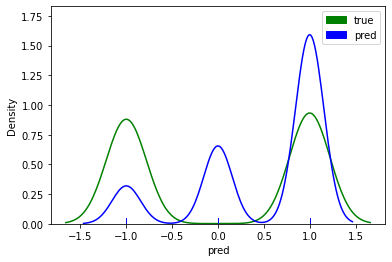

In [215]:
sns.distplot(d.true, hist=False, rug=True, color = 'green')
sns.distplot(d.pred, hist=False, rug=True, color = 'blue')
red_patch = mpatches.Patch(color='green', label='true')
black_patch = mpatches.Patch(color='blue', label='pred')
plt.legend(handles=[red_patch, black_patch])

## Predicting 5 days ahead

### Accuracy

In [197]:
100*np.sum(d.catmove.shift(-5)== d.pred) / d.shape[0]

38.44169246646027

## Moving from 3 categories to 2 categories

In [229]:
def categorize_fuzzy_2dim(f):
    if f <= (BEARISH_THRESHOLD + BULLISH_THRESHOLD)/2:
        return 0
    return 1

def categorize_move_2dim(move):
    if move <= 0:
        return 0
    return 1

In [233]:
d["pred2dim"] = d.apply(lambda row: categorize_fuzzy_2dim(row['fuzzymean']), axis = 1)
d["catmove2dim"] = d.apply(lambda row: categorize_move_2dim(row['delta']), axis = 1)
d["true2dim"] = d.catmove2dim.shift(-1)
d = d.dropna()

## Prediction distribution

In [234]:
d.pred2dim.value_counts()

1    1475
0     457
Name: pred2dim, dtype: int64

## True distribution

In [235]:
d.true2dim.value_counts()

1.0    990
0.0    942
Name: true2dim, dtype: int64

## Accuracy

In [238]:
100*np.sum(d.true2dim == d.pred2dim) / d.shape[0]

51.29399585921325

/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/mgaulia/miniforge3/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnin

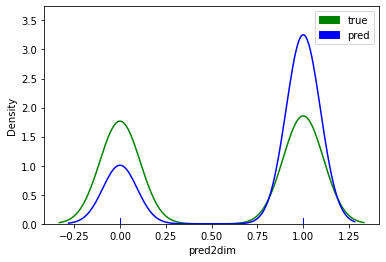

In [236]:
sns.distplot(d.true2dim, hist=False, rug=True, color = 'green')
sns.distplot(d.pred2dim, hist=False, rug=True, color = 'blue')
red_patch = mpatches.Patch(color='green', label='true')
black_patch = mpatches.Patch(color='blue', label='pred')
plt.legend(handles=[red_patch, black_patch])